In [1]:
%load_ext autoreload
%autoreload 2

import re
import os
import glob
import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
directory = '/Users/bzcschae/workspace/leitmotifs/tests/results/noise'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
pattern = r'[\d.]+'

def read_data():
    dataframes = []
    for file in csv_files:
        match = re.search(pattern, file)
        if match:
            extracted_number = match.group()[:-1]

            # print(f"Extracted number: {extracted_number}")
            if not extracted_number:
                extracted_number = 0

            extracted_number = float(extracted_number) *100
            if (extracted_number % 10) == 0:
                df = pd.read_csv(file, index_col=0)
                df["Noise Level"] = extracted_number
                dataframes.append(df)
    
    df = pd.concat(dataframes, ignore_index=True)
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    df.Precision = df.Precision * 100
    df.Recall = df.Recall * 100

    return df

df = read_data()
df

,Dataset,Method,Precision,Recall,Noise Level
0,Physiodata,LAMA,50.000000,100.000000,30.0
2,Physiodata,mSTAMP+MDL,100.000000,100.000000,30.0
3,Physiodata,mSTAMP,50.000000,100.000000,30.0
4,Physiodata,EMD*,35.000000,100.000000,30.0
5,Physiodata,K-Motifs (TOP-f),50.000000,100.000000,30.0
...,...,...,...,...,...
775,Bitcoin-Halving,K-Motifs (TOP-f),33.333333,33.333333,20.0
776,Bitcoin-Halving,K-Motifs (all),33.333333,33.333333,20.0
777,Bitcoin-Halving,LAMA (cid),66.666667,66.666667,20.0
778,Bitcoin-Halving,LAMA (ed),0.000000,0.000000,20.0


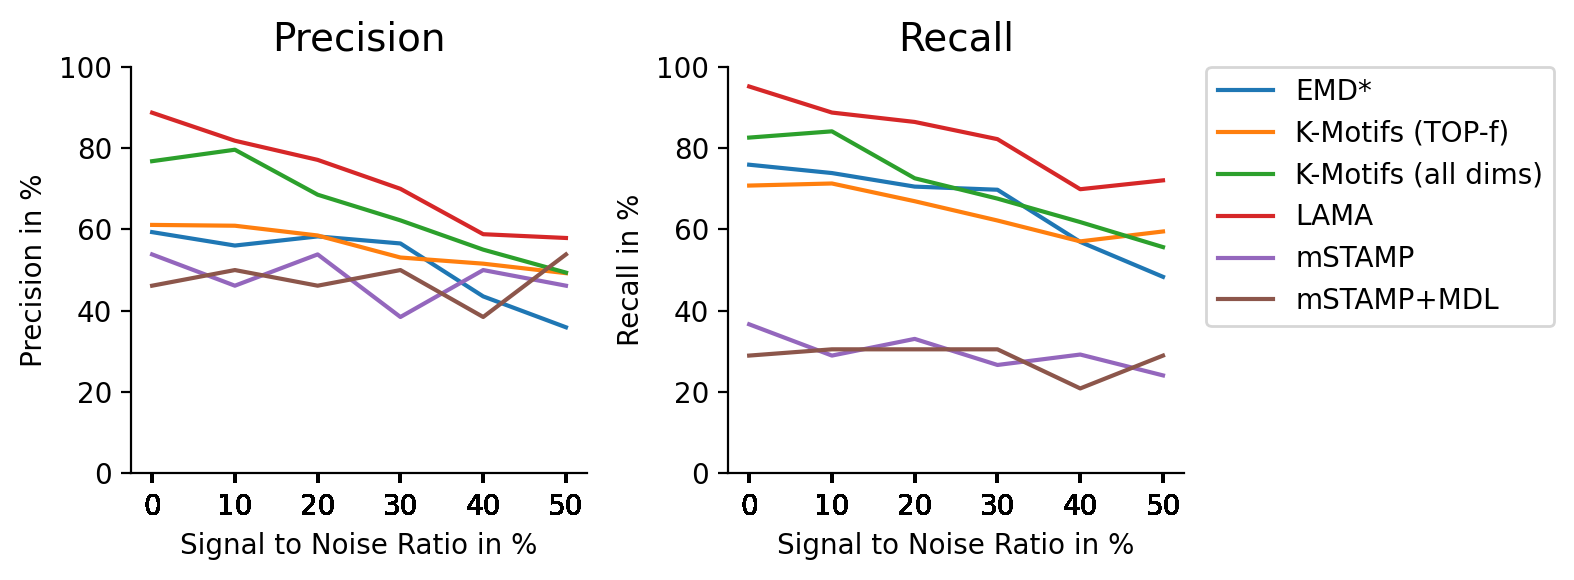

In [28]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]
df = df.sort_values(by=["Method", "Noise Level"])

fig, ax = plt.subplots(1,2, figsize=(8,3))

sns.lineplot(hue=df.Method, y=df.Precision, ax=ax[0], x=df["Noise Level"], ci=None, estimator=np.mean)
ax[0].set_title("Precision", fontsize=14)
ax[0].set_xticks(df["Noise Level"])
# ax[0].set_yticks(fontsize=10)
ax[0].set_ylim([0, 100])
ax[0].legend().set_visible(False)
ax[0].set_xlabel("Signal to Noise Ratio in %")
ax[0].set_ylabel("Precision in %")



sns.lineplot(hue=df.Method, y=df.Recall, ax=ax[1], x=df["Noise Level"], ci=None, estimator=np.mean,
            #order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"]
            )
ax[1].set_title("Recall", fontsize=14)
ax[1].set_xticks(df["Noise Level"])
ax[1].set_ylim([0, 100])
# plt.xticks(rotation=-10, fontsize=10, ha='left')
ax[1].set_xlabel("Signal to Noise Ratio in %")
ax[1].set_ylabel("Recall in %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.despine()
plt.tight_layout()

plt.savefig("../tests/results/images/lineplot_noise.pdf")
# plt.savefig("../tests/results/images/lineplot_noise_precision.pdf")

In [5]:
df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean"])

Precision     Recall
                                      mean       mean
Method              Noise Level                      
EMD*                0.0          59.326923  75.897436
                    10.0         56.025641  73.846154
                    20.0         58.269231  70.512821
                    30.0         56.538462  69.743590
                    40.0         43.525641  56.923077
                    50.0         35.929487  48.333333
K-Motifs (TOP-f)    0.0          61.098901  70.769231
                    10.0         60.897436  71.282051
                    20.0         58.498168  66.923077
                    30.0         53.082497  62.179487
                    40.0         51.570513  57.051282
                    50.0         49.236343  59.487179
K-Motifs (all dims) 0.0          76.762821  82.564103
                    10.0         79.583333  84.102564
                    20.0         68.525641  72.564103
                    30.0         62.214452  67.564103
                    40.0         55.019882  61.794872
                    50.0         49.368836  55.641026
LAMA                0.0          88.685897  95.128205
                    10.0         81.794872  88.717949
                    20.0         77.083333  86.410256
                    30.0         69.967949  82.179487
                    40.0         58.814103  69.871795
                    50.0         57.884615  72.051282
mSTAMP              0.0          53.846154  36.666667
                    10.0         46.153846  28.974359
                    20.0         53.846154  33.076923
                    30.0         38.461538  26.666667
                    40.0         50.000000  29.230769
                    50.0         46.153846  24.102564
mSTAMP+MDL          0.0          46.153846  28.974359
                    10.0         50.000000  30.512821
                    20.0         46.153846  30.512821
                    30.0         50.000000  30.512821
                    40.0         38.461538  20.897436
                    50.0         53.846154  28.974359

In [6]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 51.602564 & 60.000000 & 65.876068 & 80.000000 \\
K-Motifs (TOP-f) & 55.730643 & 50.000000 & 64.615385 & 60.000000 \\
K-Motifs (all dims) & 65.245828 & 78.235294 & 70.705128 & 100.000000 \\
LAMA & 72.371795 & 80.000000 & 82.393162 & 100.000000 \\
mSTAMP & 48.076923 & 50.000000 & 29.786325 & 20.000000 \\
mSTAMP+MDL & 47.435897 & 50.000000 & 28.397436 & 20.000000 \\
\bottomrule
\end{tabular}



In [7]:
print(df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

|                               |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:------------------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| ('EMD*', 0.0)                 |                 59.3269 |                   65      |              75.8974 |                80      |
| ('EMD*', 10.0)                |                 56.0256 |                   50      |              73.8462 |                80      |
| ('EMD*', 20.0)                |                 58.2692 |                   60      |              70.5128 |                80      |
| ('EMD*', 30.0)                |                 56.5385 |                   65      |              69.7436 |                83.3333 |
| ('EMD*', 40.0)                |                 43.5256 |                   37.5    |              56.9231 |                66.6667 |
| ('EMD*', 50.0)                |               